In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.6.0'

In [ ]:
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from PIL import Image as im
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
path='/content/drive/My Drive/Hackathons/'

In [ ]:
data=np.load(path+'preprocessed_data/data.npy')
target=np.load(path+'preprocessed_data/ulable.npy')

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=data.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.25)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4406, 64, 64, 3)
(4406, 2)
(1469, 64, 64, 3)
(1469, 2)


In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
history=model.fit(x=X_train,y=y_train,batch_size=100,epochs=250,validation_data=(X_test,y_test))

Epoch 1/250
45/45 [==============================] - 17s 27ms/step - loss: 0.5515 - accuracy: 0.7476 - val_loss: 0.5103 - val_accuracy: 0.7590
Epoch 2/250
45/45 [==============================] - 1s 19ms/step - loss: 0.3644 - accuracy: 0.8459 - val_loss: 0.2992 - val_accuracy: 0.8918
Epoch 3/250
45/45 [==============================] - 1s 19ms/step - loss: 0.2618 - accuracy: 0.9094 - val_loss: 0.2241 - val_accuracy: 0.9251
Epoch 4/250
45/45 [==============================] - 1s 19ms/step - loss: 0.1862 - accuracy: 0.9365 - val_loss: 0.2035 - val_accuracy: 0.9306
Epoch 5/250
45/45 [==============================] - 1s 19ms/step - loss: 0.1776 - accuracy: 0.9405 - val_loss: 0.1678 - val_accuracy: 0.9387
Epoch 6/250
45/45 [==============================] - 1s 19ms/step - loss: 0.1238 - accuracy: 0.9564 - val_loss: 0.1473 - val_accuracy: 0.9462
Epoch 7/250
45/45 [==============================] - 1s 19ms/step - loss: 0.1173 - accuracy: 0.9598 - val_loss: 0.1496 - val_accuracy: 0.9421
Epoch

In [ ]:
model.save('hck_v.h5')

In [ ]:
model.save_weights('hck_w')

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

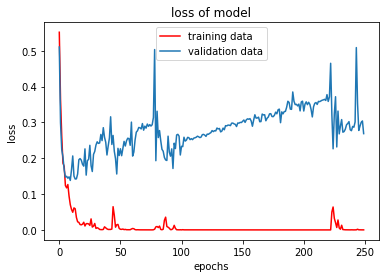

In [ ]:
#loss
plt.plot(history.history['loss'],'r',label='training data')
plt.plot(history.history['val_loss'],label='validation data')
plt.title('loss of model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

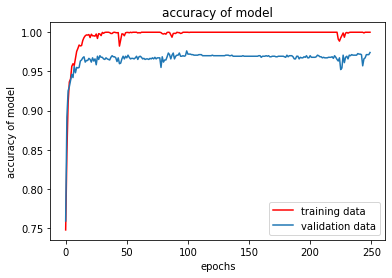

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training data')
plt.plot(history.history['val_accuracy'],label='validation data')
plt.title('accuracy of model')
plt.xlabel('epochs')
plt.ylabel('accuracy of model')
plt.legend()

In [ ]:
print(model.evaluate(X_test,y_test))

46/46 [==============================] - 0s 4ms/step - loss: 0.2687 - accuracy: 0.9741
[0.2686746120452881, 0.9741320610046387]


In [ ]:
tar_data=[]
pp=path+'test/test'
for img in os.listdir(pp):
  img_path=os.path.join(pp,img)
  image=load_img(img_path)
  image=img_to_array(image)
  tar_data.append(image)



In [ ]:
tar_data=np.array(tar_data)/255.0

In [ ]:
ans=[]
for i in range (len(tar_data)):
  y_pred=model.predict(tar_data[i].reshape(1,64,64,3))
  ans.append(y_pred.argmax())

In [ ]:
pp=path+'op_pics/'
for i in range (len(tar_data)):
  y_pred=model.predict(tar_data[i].reshape(1,64,64,3))
  if y_pred.argmax()==1:
    to_save_1=tar_data[i]
    np.save('1.jpg',to_save_1)
  if y_pred.argmax()==0:
    to_save_0=tar_data[i]
    np.save('0.jpg',to_save_0)




In [ ]:
x=np.array(ans)
t=np.unique(ans)
print(t)

[0 1]


In [ ]:
te=model.predict(tar_data[45].reshape(1,64,64,3))
print(te.argmax())

1


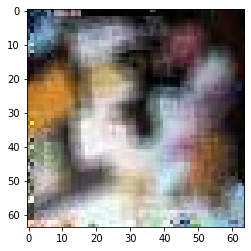

In [ ]:
plt.imshow(tar_data[45])

In [ ]:
import random
import json
# from utils.io import write_json

def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)


def generate_sample_file(filename):
    res = {}
    for i in range(len(tar_data)):
        y_pred=model.predict(tar_data[i].reshape(1,64,64,3))
        if y_pred.argmax()==1:
          test_set = str(i)+'_'+str(1) + '.jpg'
          res[test_set] = 3
        if y_pred.argmax()==0:
          test_set = str(i)+'_'+str(0) + '.jpg'
          res[test_set] = 3


    write_json(filename, res)

if __name__ == '__main__':
    generate_sample_file('./result.json')



In [ ]:
from google.colab import files
files.download('result.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>